# Pymaceuticals Inc.
---

### Analysis

- the metrics that were calculated showed different results. as results of lower median and means suggest the potential efficacy in reducing the tumor size, while the smaller Std. Dev, and Std. Err might indictae less variability and more reliable estimates.
- while the drug Capomulin showed the affect on timepoints when was tested and the reduction of the tumor while using. 
- there was a relation of increase of both weight as the size of the tumor increasing. 

 

In [156]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/owner/Library/CloudStorage/OneDrive-Personal/Starter_Code-9/Pymaceuticals/data/mouse_metadata.csv"
study_results_path = "/Users/owner/Library/CloudStorage/OneDrive-Personal/Starter_Code-9/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")



# Display the data table for preview
column_order = ["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]
merged_data[column_order].head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [157]:
# Checking the number of mice.

num_mice_original = merged_data["Mouse ID"].nunique()

print(f"{num_mice_original}")

249


In [158]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#identify the duplicates rows

duplicate_mouse = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Display only the 'Mouse ID' from the duplicate rows
unique_mouse_ids = duplicate_rows['Mouse ID'].unique()
print(unique_mouse_ids)


['g989']


In [176]:
# Optional: Get all the data for the duplicate mouse ID. 
# Identify duplicate rows based on Mouse ID and Timepoint

duplicate_rows = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Get all the data for the duplicate mouse ID

duplicate_mouse_data = merged_data[merged_data["Mouse ID"].isin(duplicate_rows["Mouse ID"])]


# Display all data for the duplicate mouse ID

duplicate_mouse_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [178]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

cleaned_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [179]:
# Checking the number of mice in the clean DataFrame.

num_mice_cleaned = cleaned_data["Mouse ID"].nunique()

print(f"{num_mice_cleaned}")

249


## Summary Statistics

In [180]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


Selected_regimens = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol"]

# Assemble the resulting series into a single summary DataFrame.
selected_data = cleaned_data[cleaned_data["Drug Regimen"].isin(selected_regimens)]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen
summary_statistics_selected = selected_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_statistics_selected.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 
                                        'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']


# Display the summary statistics table for the selected drug regimens
summary_statistics_selected.head()






,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [181]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Group the data by "Drug Regimen" and calculate summary statistics using the agg method
summary_statistics_advanced = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem').reset_index()

# Display the advanced summary statistics table
summary_statistics_advanced.head()


,Drug Regimen,Mean,Median,Variance,Std_Dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

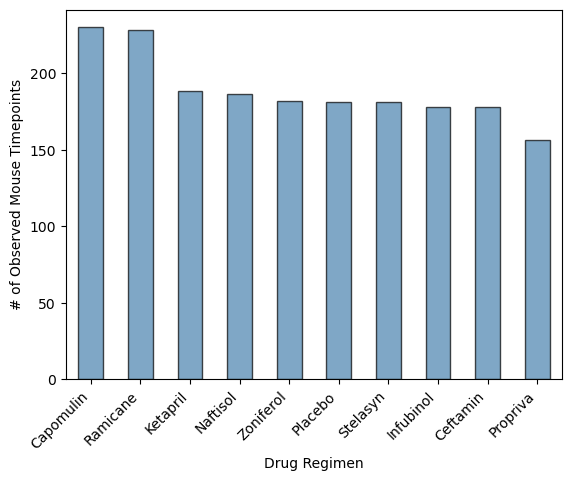

In [182]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.# Count the number of rows for each drug regimen
 #Count the number of rows for each drug regimen
drug_regimen_counts = cleaned_data["Drug Regimen"].value_counts()

# Create a bar plot using Pandas
drug_regimen_counts.plot(kind='bar', color='#4982AF', alpha=0.7, edgecolor='black')

# Customize the plot
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(range(0, 201, 50))  # Set y-axis ticks from 0 to 200 with increments of 50
plt.grid(axis='y', linestyle='', alpha=0.5)

# Show the plot
plt.show()



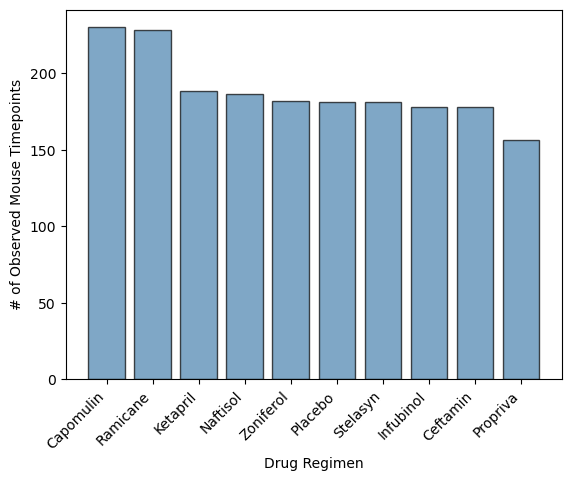

In [183]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of rows for each drug regimen
drug_regimen_counts = cleaned_data["Drug Regimen"].value_counts()

# Create a bar plot using pyplot
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='#4982AF', alpha=0.7, edgecolor='black')

# Customize the plot
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(range(0, 201, 50))  # Set y-axis ticks from 0 to 200 with increments of 50
plt.grid(axis='y', linestyle='', alpha=0.5)

# Show the plot
plt.show()

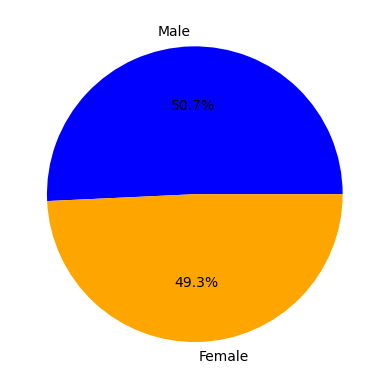

In [184]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of male and female mice
gender_distribution = cleaned_data["Sex"].value_counts()

# Create a pie plot using Pandas
gender_distribution.plot.pie(autopct='%1.1f%%', colors=['blue', 'orange'])

# Customize the plot
plt.ylabel('')  # Remove y-axis label

# Show the plot
plt.show()

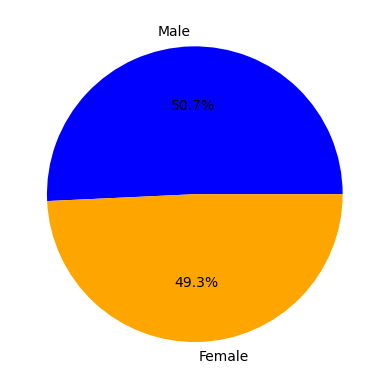

In [185]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of male and female mice
gender_distribution = cleaned_data["Sex"].value_counts()

# Create a pie plot using pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['blue', 'orange'])


# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [186]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Select data for the specified treatment regimens
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
selected_data = cleaned_data[cleaned_data["Drug Regimen"].isin(selected_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoints = selected_data.groupby("Mouse ID")["Timepoint"].max()

# Create a DataFrame with the last timepoints
last_timepoints_df = pd.DataFrame({"Timepoint": last_timepoints}).reset_index()

# Merge the last timepoints DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints_df, selected_data, on=["Mouse ID", "Timepoint"], how="left")

# Display the DataFrame with the final tumor volume
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [187]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty dictionary to store potential outliers
potential_outliers = {}

# Loop through each treatment
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    # Check for potential outliers and store them in the dictionary
    potential_outliers[treatment] = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

# Print the results
for treatment, outliers in potential_outliers.items():
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


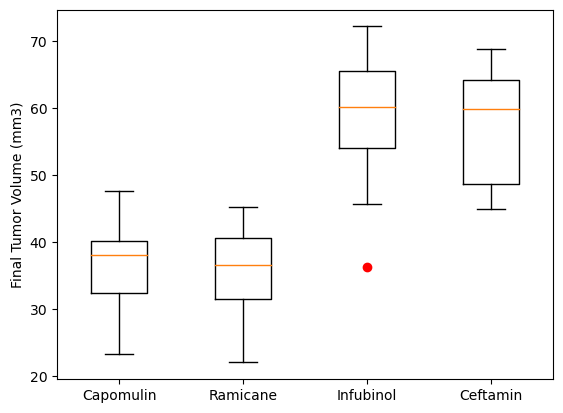

In [188]:
# Create a list to store tumor volumes for each treatment

tumor_volumes = [final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]
                 ["Tumor Volume (mm3)"].values for treatment in treatments]

# Create a box plot

plt.boxplot(tumor_volumes, labels=treatments, sym='r')  # 'sym' adds red crosses for potential outliers
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

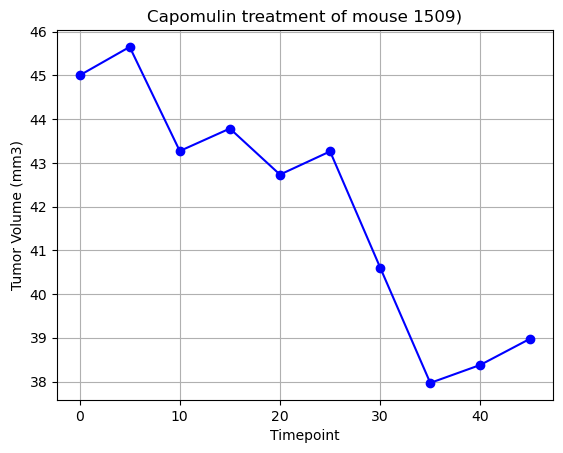

In [189]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose a mouse treated with Capomulin
selected_mouse_id = "b128"
capomulin_mouse_data = cleaned_data[(cleaned_data["Drug Regimen"] == "Capomulin") & (cleaned_data["Mouse ID"] == selected_mouse_id)]

# Create a line plot
plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"], marker='o', color='blue')
plt.title("Capomulin treatment of mouse 1509)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()

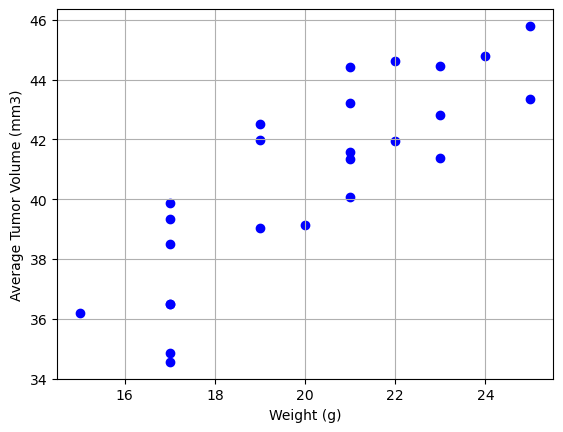

In [190]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge average tumor volume with mouse weight
capomulin_summary = pd.merge(average_tumor_volume, capomulin_data[["Mouse ID", "Weight (g)"]], on="Mouse ID", how="left").drop_duplicates()

# Create a scatter plot
plt.scatter(capomulin_summary["Weight (g)"], capomulin_summary["Tumor Volume (mm3)"], color='Blue')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694722


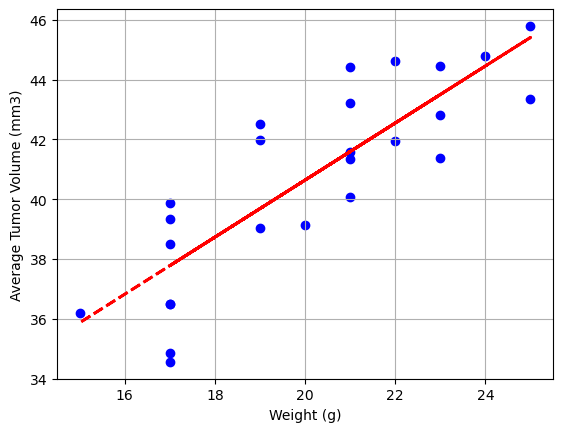

In [192]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Calculate the correlation coefficient
correlation = capomulin_summary["Weight (g)"].corr(capomulin_summary["Tumor Volume (mm3)"])

# Calculate linear regression parameters
slope, intercept, r_value, p_value, std_err = linregress(capomulin_summary["Weight (g)"], capomulin_summary["Tumor Volume (mm3)"])

# Create a scatter plot with linear regression line
plt.scatter(capomulin_summary["Weight (g)"], capomulin_summary["Tumor Volume (mm3)"], color='blue')
plt.plot(capomulin_summary["Weight (g)"], slope * capomulin_summary["Weight (g)"] + intercept, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation}")

# Display the plot
plt.show()